# Forecasting 4: Comparing Forecasting Techniques

The following notebook will compare the AutoARIMA, Prophet, and XGBoost models for predicting weather forecasts. The goal of this is to determine weighting for a mixed approach, where forecasts use weighted predictions of each model that are then averaged to produce a (hopefully) more robust measure.

Let's start by importing packages and getting a couple of test datasets, then developing each of the models.

## 1. Importing Packages and Data

### Defining Required Packages and Region Information

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

from backend.regionweather import RegionWeather
from backend.autoarima import AutoARIMAForecast
# from backend.prophet import ProphetForecast
# from backend.xgb import XGBoostForecast

# Get the weather data for the region
region_data = {
    'US-FLA-FMPP': {'lat': 28.525581, 'lon': -81.536775, 'alt': 0},
    'US-FLA-FPC': {'lat': 28.996695, 'lon': -82.886613, 'alt': 0},
    'US-FLA-FPL': {'lat': 27.917488, 'lon': -81.450970, 'alt': 0},
    'US-FLA-GVL': {'lat': 29.619310, 'lon': -82.328732, 'alt': 0},
    'US-FLA-HST': {'lat': 25.456904, 'lon': -80.588092, 'alt': 0},
    'US-FLA-JEA': {'lat': 30.390902, 'lon': -83.679837, 'alt': 0},
    'US-FLA-SEC': {'lat': 28.805983, 'lon': -82.306291, 'alt': 0},
    'US-FLA-TAL': {'lat': 30.437174, 'lon': -84.248042, 'alt': 0},
    'US-FLA-TEC': {'lat': 27.959413, 'lon': -82.144821, 'alt': 0}
}

### Create RegionWeather Entities

In [2]:
region_name = list(region_data.keys())[0]
region_lat = region_data[region_name]['lat']
region_lon = region_data[region_name]['lon']
region_alt = region_data[region_name]['alt']

end = dt.datetime.now()
start = end - dt.timedelta(days=5)

# Get the weather data for the region
region_weather = RegionWeather(region_name, region_lat, region_lon, region_alt, start, end).to_dict()

fifteen = region_weather['df_15m']
hourly = region_weather['df_hourly']
daily = region_weather['df_daily']

Fetching Hourly Object...
Hourly Object Fetched!
Fetching Hourly Data from Object...
Hourly Object Fetched!
Hourly Data Cleaned!
Fetching Daily Data...
Daily Data Fetched!
Fetching Weekly Data...
Weekly Data Aggregated and Fetched!
Fetching Monthly Data...
Fetching Daily Data...
Monthly Data Fetched!
15 Minute Data Interpolated!


### Create Temperature Objects

Daily Data is still broken for some reason, I'll have to go back and troubleshoot that later...

In [3]:
temp_15m = fifteen['temp'].reset_index().dropna()
temp_15m.columns = ['ds', 'y']
temp_15m['unique_id'] = '1'

temp_hourly = hourly['temp'].reset_index().dropna()
temp_hourly.columns = ['ds', 'y']
temp_hourly['unique_id'] = '2'

In [4]:
temp_15m.head()

,ds,y,unique_id
0,2025-03-24 23:00:00,24.6,1
1,2025-03-24 23:15:00,24.5,1
2,2025-03-24 23:30:00,24.4,1
3,2025-03-24 23:45:00,24.3,1
4,2025-03-25 00:00:00,24.2,1


In [5]:
temp_hourly.head()

,ds,y,unique_id
0,2025-03-24 23:00:00,24.6,2
1,2025-03-25 00:00:00,24.2,2
2,2025-03-25 01:00:00,21.9,2
3,2025-03-25 02:00:00,22.4,2
4,2025-03-25 03:00:00,22.4,2


Now the data has been prepared, and we can move onto testing the forecasting models.

## 2. AutoARIMA

In [6]:
aarima = AutoARIMAForecast(region_name, temp_15m)

Initializing AutoARIMA model for region: US-FLA-FMPP
2025-03-29 22:47:39,770 - AutoARIMAForecast_US-FLA-FMPP - INFO - Initializing AutoARIMA model for region: US-FLA-FMPP
Processing initial dataframe with 477 rows
2025-03-29 22:47:39,772 - AutoARIMAForecast_US-FLA-FMPP - INFO - Processing initial dataframe with 477 rows
Fitting AutoARIMA model for region US-FLA-FMPP with 477 data points...
2025-03-29 22:47:40,672 - AutoARIMAForecast_US-FLA-FMPP - INFO - Fitting AutoARIMA model for region US-FLA-FMPP with 477 data points
Detecting time series frequency...
2025-03-29 22:47:40,673 - AutoARIMAForecast_US-FLA-FMPP - INFO - Detecting time series frequency
Detected frequency: 15min
2025-03-29 22:47:40,675 - AutoARIMAForecast_US-FLA-FMPP - INFO - Detected frequency: 15min
Determining seasonal period...
2025-03-29 22:47:40,675 - AutoARIMAForecast_US-FLA-FMPP - INFO - Determining seasonal period
Determined season length: 96
2025-03-29 22:47:40,676 - AutoARIMAForecast_US-FLA-FMPP - INFO - Determi

Now that the model has been fitted, we can forecast futue data.

In [7]:
forecasts = aarima.forecast(level=[95])
res = aarima.get_results()
summary = aarima.get_model_summary()

Generating forecast for region US-FLA-FMPP for next 96 periods (requested: 96, adjusted based on freq: 15min)...
2025-03-29 22:49:07,571 - AutoARIMAForecast_US-FLA-FMPP - INFO - Generating forecast for region US-FLA-FMPP for next 96 periods (freq: 15min)
Last historical date: 2025-03-29 22:00:00
2025-03-29 22:49:07,574 - AutoARIMAForecast_US-FLA-FMPP - INFO - Last historical date: 2025-03-29 22:00:00
Next forecast timestamp: 2025-03-29 22:15:00
2025-03-29 22:49:07,578 - AutoARIMAForecast_US-FLA-FMPP - INFO - Next forecast timestamp: 2025-03-29 22:15:00
Generated future dates from 2025-03-29 22:15:00 to 2025-03-30 22:00:00
Time difference between last historical and first forecast: 0 days 00:15:00
2025-03-29 22:49:07,579 - AutoARIMAForecast_US-FLA-FMPP - INFO - Generated future dates from 2025-03-29 22:15:00 to 2025-03-30 22:00:00
2025-03-29 22:49:07,583 - AutoARIMAForecast_US-FLA-FMPP - INFO - Time difference between last historical and first forecast: 0 days 00:15:00
Created forecast 

In [8]:
summary

{'region_name': 'US-FLA-FMPP',
 'fitted': True,
 'frequency': '15min',
 'season_length': 96,
 'data_points': 477,
 'forecast_generated': True,
 'forecast_periods': 96}

Creating forecast plot for region US-FLA-FMPP...
2025-03-29 22:49:08,436 - AutoARIMAForecast_US-FLA-FMPP - INFO - Creating forecast plot for region US-FLA-FMPP
Last historical date: 2025-03-29 22:00:00, value: 26.8
First forecast date: 2025-03-29 22:15:00, value: 23.600642554972772
Time difference: 0 days 00:15:00
2025-03-29 22:49:08,455 - AutoARIMAForecast_US-FLA-FMPP - INFO - Last historical date: 2025-03-29 22:00:00, value: 26.8
2025-03-29 22:49:08,456 - AutoARIMAForecast_US-FLA-FMPP - INFO - First forecast date: 2025-03-29 22:15:00, value: 23.600642554972772
2025-03-29 22:49:08,457 - AutoARIMAForecast_US-FLA-FMPP - INFO - Time difference: 0 days 00:15:00
Added bridge point to create continuous forecast line
2025-03-29 22:49:08,461 - AutoARIMAForecast_US-FLA-FMPP - INFO - Added bridge point to create continuous forecast line
Adding 95% confidence interval to plot...
2025-03-29 22:49:08,463 - AutoARIMAForecast_US-FLA-FMPP - INFO - Adding 95% confidence interval to plot
Forecast plot 

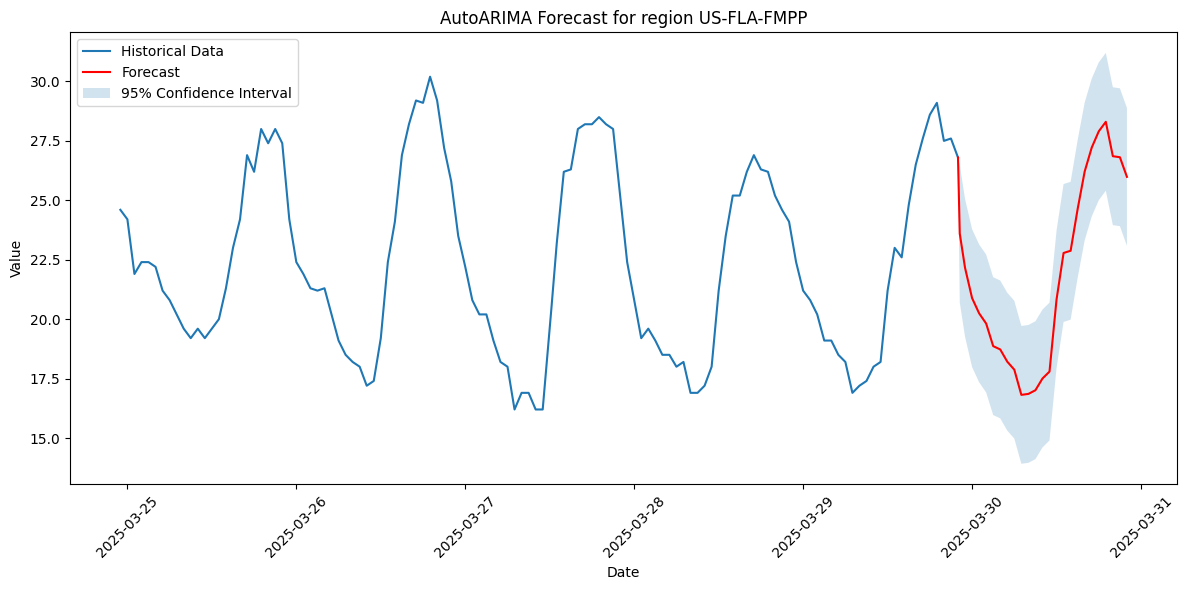

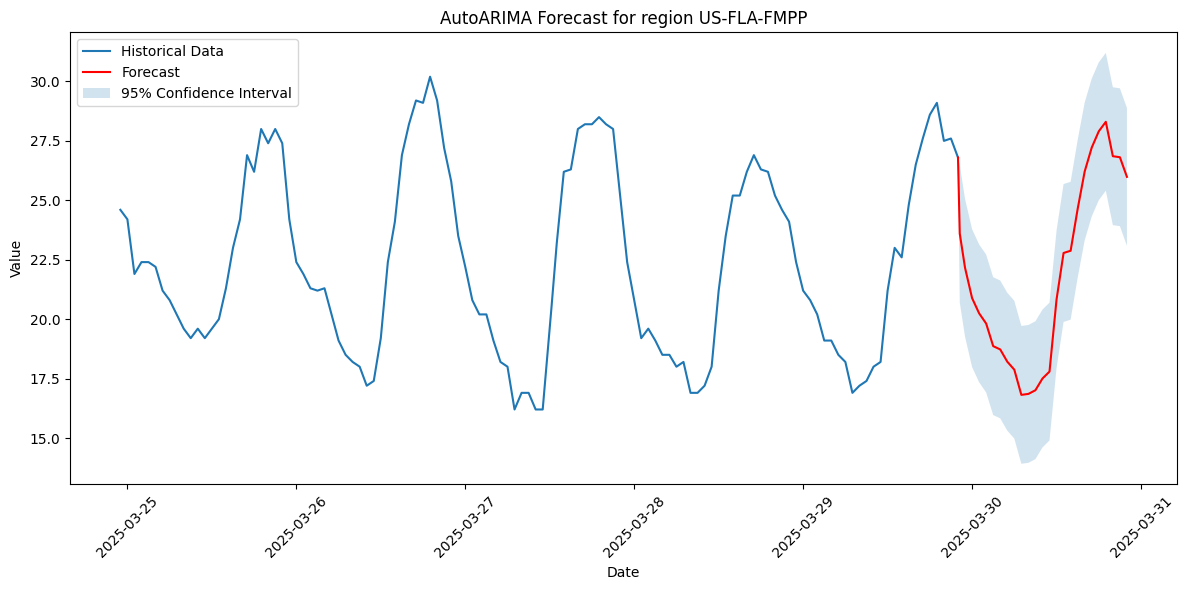

In [9]:
aarima.plot_forecast()

In [10]:
eval_res = aarima.evaluate()
eval_res

Performing cross-validation for region US-FLA-FMPP with h=12, step_size=12, n_windows=5...
2025-03-29 22:49:08,826 - AutoARIMAForecast_US-FLA-FMPP - INFO - Performing cross-validation for region US-FLA-FMPP with h=12, step_size=12, n_windows=5
Executing cross-validation...
2025-03-29 22:49:08,827 - AutoARIMAForecast_US-FLA-FMPP - INFO - Executing cross-validation
Cross-validation generated 60 rows
2025-03-29 23:11:45,285 - AutoARIMAForecast_US-FLA-FMPP - INFO - Cross-validation generated 60 rows
Computing evaluation metrics...
2025-03-29 23:11:45,286 - AutoARIMAForecast_US-FLA-FMPP - INFO - Computing evaluation metrics
Error during evaluation: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('float64')
2025-03-29 23:11:45,288 - AutoARIMAForecast_US-FLA-FMPP - ERROR - Error during evaluation: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('float64')
Falling back to manual calculation of metrics
2025-03-29 23:11:45,289 - AutoARIMAFore

,unique_id,metric,value
0,1,mae,0.781661
1,1,mape,3.457634
2,1,mase,3.131907
3,1,rmse,1.012237
4,1,smape,3.499234


Now we have a pretty good model according to the metrics. 

(I'll go deeper into this in the article and writeup, I am looking at [this source](<https://medium.com/analytics-vidhya/assessment-of-accuracy-metrics-for-time-series-forecasting-bc115b655705>) for evaluating the metrics)